In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk

/Users/macintosh/Library/Python/3.9/lib/python/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
test = pd.read_csv('./test.csv', index_col='id')
train = pd.read_csv('./train.csv', index_col='id')

In [4]:
train

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


0    4342
1    3271
Name: target, dtype: int64


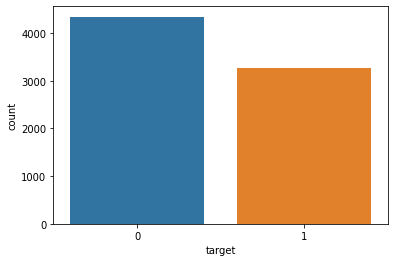

In [5]:
sns.countplot(x=train.target)
print(train.target.value_counts())

In [6]:
y=train.target

## Cleaning the text ##

In [7]:
def clean_text(text):
    #Make text lowercase, remove text in square brackets,remove links,remove punctuation
    #and remove words containing numbers
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [8]:
train.text = train.text.apply(clean_text)
test.text = test.text.apply(clean_text)

In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [10]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'û', 'ï','ûò']
stop_words = stop_words + more_stopwords

In [11]:
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [12]:
train.text = train.text.apply(remove_stopwords)
test.text = test.text.apply(remove_stopwords)

In [17]:
from nltk import SnowballStemmer

In [18]:
stemmer = nltk.SnowballStemmer("english")

In [19]:
def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [23]:
train.text.apply(stemm_text)

id
1                deed reason earthquak may allah forgiv us
4                     forest fire near la rong sask canada
5        resid ask shelter place notifi offic evacu she...
6             peopl receiv wildfir evacu order california 
7        got sent photo rubi alaska smoke wildfir pour ...
                               ...                        
10869      two giant crane hold bridg collaps nearbi home 
10870    ariaahrari thetawniest control wild fire calif...
10871                                      volcano hawaii 
10872    polic investig ebik collid car littl portug eb...
10873    latest home raze northern california wildfir  ...
Name: text, Length: 7613, dtype: object

In [24]:
train.text = train.text.apply(stemm_text)
test.text = test.text.apply(stemm_text)

## Creating a dictionary for the text ##

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer

In [26]:
tfidf = TfidfVectorizer()
train_vector = tfidf.fit_transform(train.text)
X_test =tfidf.transform(test.text)

In [27]:
tfidf.vocabulary_

{'deed': 2950,
 'reason': 9573,
 'earthquak': 3536,
 'may': 7276,
 'allah': 310,
 'forgiv': 4382,
 'us': 12498,
 'forest': 4374,
 'fire': 4222,
 'near': 7975,
 'la': 6544,
 'rong': 9976,
 'sask': 10210,
 'canada': 1748,
 'resid': 9757,
 'ask': 666,
 'shelter': 10518,
 'place': 8962,
 'notifi': 8199,
 'offic': 8335,
 'evacu': 3873,
 'order': 8501,
 'expect': 3938,
 'peopl': 8804,
 'receiv': 9589,
 'wildfir': 13004,
 'california': 1716,
 'got': 4849,
 'sent': 10404,
 'photo': 8887,
 'rubi': 10049,
 'alaska': 265,
 'smoke': 10803,
 'pour': 9112,
 'school': 10276,
 'rockyfir': 9937,
 'updat': 12460,
 'hwi': 5568,
 'close': 2208,
 'direct': 3173,
 'due': 3467,
 'lake': 6564,
 'counti': 2548,
 'cafir': 1691,
 'flood': 4297,
 'disast': 3188,
 'heavi': 5229,
 'rain': 9464,
 'caus': 1887,
 'flash': 4267,
 'street': 11251,
 'manitou': 7156,
 'colorado': 2318,
 'spring': 11054,
 'area': 572,
 'im': 5678,
 'top': 12012,
 'hill': 5332,
 'see': 10352,
 'wood': 13107,
 'there': 11784,
 'emerg': 3682,

In [28]:
train_vector.todense().shape

(7613, 13489)

In [29]:
train_vector.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

# Train Test Split #

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(train_vector, y, test_size=0.33, random_state=42)

# Model NN (in progress) # 

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, GRU
from tensorflow.keras.losses import sparse_categorical_crossentropy

2023-10-19 18:16:33.736223: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
def sparse_cat_loss(y_true,y_pred):
  return sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)

In [154]:
vocab_size = len(tfidf.vocabulary_)
embed_dim = 16
rnn_neurons = 10000
batch_size = 128

In [152]:
model = Sequential()

model.add(Embedding(vocab_size, embed_dim,batch_input_shape=[batch_size, None]))
model.add(GRU(rnn_neurons,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'))
    # Final Dense Layer to Predict
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss=sparse_cat_loss) 

In [153]:
model.fit(train_vector.todense(), y)

InvalidArgumentError: Graph execution error:

Detected at node 'sparse_cat_loss/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert' defined at (most recent call last):
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell
      await result
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/macintosh/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/gg/8rlhp3296770kr3vmmn424200000gn/T/ipykernel_14409/1818488284.py", line 1, in <cell line: 1>
      model.fit(train_vector.todense(), y)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/var/folders/gg/8rlhp3296770kr3vmmn424200000gn/T/ipykernel_14409/4006526378.py", line 2, in sparse_cat_loss
      return sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/losses.py", line 2354, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/backend.py", line 5762, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_cat_loss/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert'
assertion failed: [Condition x == y did not hold element-wise:] [x (sparse_cat_loss/SparseSoftmaxCrossEntropyWithLogits/Shape_1:0) = ] [2769536 1] [y (sparse_cat_loss/SparseSoftmaxCrossEntropyWithLogits/strided_slice:0) = ] [128 21637]
	 [[{{node sparse_cat_loss/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert}}]] [Op:__inference_train_function_6800]

In [104]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()      

In [106]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, train_vector, y, cv=6, scoring='f1')

array([0.62472406, 0.59100204, 0.5863771 , 0.55414013, 0.68140704,
       0.71554252])

## Report of the model ##

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [33]:
def report(model, X_valid):
    preds = model.predict(X_valid)
    print(classification_report(y_valid,preds))
    matrix = confusion_matrix(y_pred=preds, y_true=y_valid,)
    dis = ConfusionMatrixDisplay(confusion_matrix=matrix)
    dis.plot()
    plt.show()

# Model Naive Bayes Classification #

In [35]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(train_vector,y)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1446
           1       0.93      0.80      0.86      1067

    accuracy                           0.89      2513
   macro avg       0.90      0.88      0.89      2513
weighted avg       0.89      0.89      0.89      2513



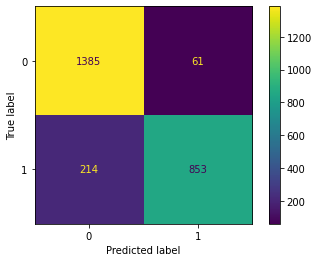

In [36]:
report(nb, X_valid)

In [41]:
prediction_nb = nb.predict(X_test)

In [47]:
pd.DataFrame(data=prediction_nb, index=test.index, columns=['target'])

,target
id,
0,1
2,0
3,1
9,1
11,1
...,...
10861,1
10865,1
10868,1


# Model Random Forest #

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
RFmodel = RandomForestClassifier()

In [39]:
RFmodel=RandomForestClassifier(n_estimators=300, max_features='sqrt',criterion='gini')
RFmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1446
           1       0.79      0.64      0.70      1067

    accuracy                           0.77      2513
   macro avg       0.78      0.76      0.76      2513
weighted avg       0.78      0.77      0.77      2513



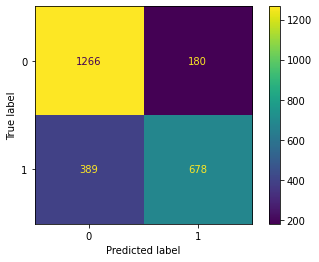

In [40]:
report(RFmodel, X_valid)

In [44]:
prediction_RF_result = RFmodel.predict(X_test)

In [45]:
pd.DataFrame(data=prediction_RF_result, index=test.index, columns=['target'])

,target
id,
0,0
2,1
3,1
9,1
11,1
...,...
10861,1
10865,0
10868,1
